In [11]:
from TestEnv import Electric_Car
import random
import pandas as pd
import numpy as np

train_name = "data/validate.xlsx"
rule_env = Electric_Car(path_to_test_data=train_name)

In [88]:
def quantile_rule_agent(last_24_prices, lower_quantile=0.25, upper_quantile=0.75):
    if last_24_prices[-1] < np.quantile(last_24_prices, lower_quantile):
        action = 1
    elif last_24_prices[-1] > np.quantile(last_24_prices, upper_quantile):
        action = -1
    else:
        action = 0
    return action


length_data = len(rule_env.test_data) * 24 - 1 
rewards = []
last_24_prices = []

print('length of data', length_data)

for i in range(length_data):
    # print(i)
    if i == 0: 
        action = 0
    else:
        action = quantile_rule_agent(last_24_prices)
    
    action = random.choice([-1, 0, 1])

    obs, reward, terminated, _, _ = rule_env.step(action)

    last_24_prices.append(obs[1])
    if len(last_24_prices) > 24:
        last_24_prices.pop(0)
    
    rewards.append(reward)
    # if reward != 0:
        # print('>> reward', reward)

print("Cummulative reward: ", sum(rewards))

length of data 26303
Cummulative reward:  -8240.26399592593


In [12]:
def peak_rule_agent(obs, peak_df):
    day_of_year = obs[4]
    current_hour = obs[2]
    current_week = int(day_of_year / 7) + 1

    # get the row of the week
    peak_week = peak_df.loc[peak_df['week'] == current_week]

    if current_hour == 4:
        print('SELL at hour', current_hour)
        action = 1
    elif current_hour == 5:
        print('SELL at hour', current_hour)
        action = 1
    elif current_hour == peak_week['non_business_peak'].values:
        print('SELL at hour', current_hour)
        action = -1
    elif current_hour == peak_week['business_peak'].values:
        action = -1
    # elif current_hour == peak_week['business_valley'].values:
    #     action = 1
    # elif current_hour == peak_week['non_business_valley'].values:
    #     print('BUY at hour', current_hour)
    #     action = 1
    else:
        action = 0
    return action 


peak_df = pd.read_csv('data/peak_df.csv')
length_data = len(rule_env.test_data) * 24 - 1 
rewards = []

print('length of data', length_data)

for i in range(length_data):
    # print(i)
    if i == 0: 
        action = 0
    else:
        action = peak_rule_agent(obs, peak_df)

    obs, reward, terminated, _, _ = rule_env.step(action)
    
    rewards.append(reward)
    # if reward != 0:
        # print('>> reward', reward)

print("Cummulative reward: ", sum(rewards))

length of data 17519
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at hour 19.0
SELL at hour 4.0
SELL at hour 5.0
SELL at h

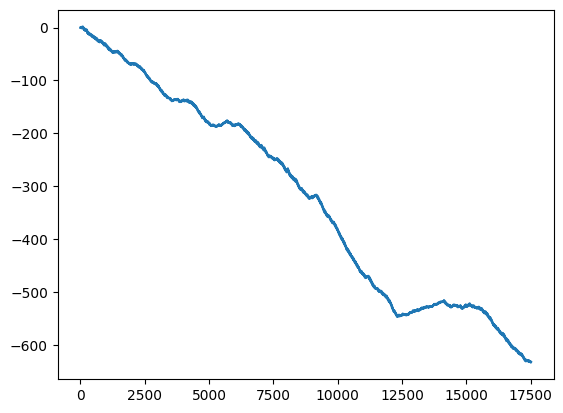

In [13]:
# plot the cummulative plcummulative reward
import matplotlib.pyplot as plt

# plot the first 1000 rewards cummulatively
plt.plot(np.cumsum(rewards))